# cleaning training dataset

In [201]:
import pandas as pd
import numpy as np

a_train = pd.read_csv('adult.data',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'],skipinitialspace=True)
print(a_train.shape)
a_train.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [202]:
a_train = a_train.replace(to_replace='?',value=np.nan)

In [203]:
a_train.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

In [204]:
a_train[a_train['workclass'].isna()].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K


In [205]:
a_train = a_train.dropna(how='any',subset=['workclass','occupation','native-country'])
a_train = a_train.reset_index(drop=True)

In [206]:
print(a_train.shape)
a_train.isna().sum()

(30162, 15)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

total length: 30162
<=50K: 22654
>50K: 7508


<AxesSubplot:>

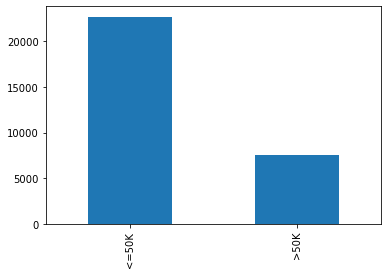

In [207]:
import matplotlib.pyplot as plt

print("total length:",len(a_train))
print("<=50K:",len(a_train[a_train['class'] =='<=50K']))
print(">50K:",len(a_train[a_train['class'] =='>50K']))
a_train["class"].value_counts().plot(kind='bar')

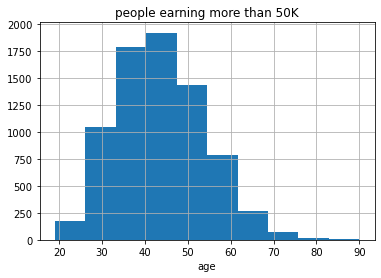

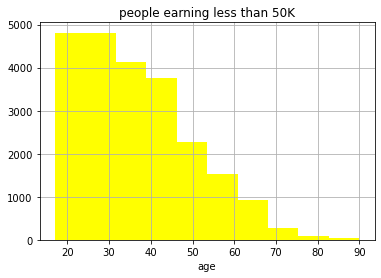

In [208]:
a_train[a_train['class']=='>50K']['age'].hist()
plt.xlabel('age')
plt.title('people earning more than 50K')
plt.show()

a_train[a_train['class']=='<=50K']['age'].hist(color='yellow')
plt.title('people earning less than 50K')
plt.xlabel('age')
plt.show()

-------- workclass -----------


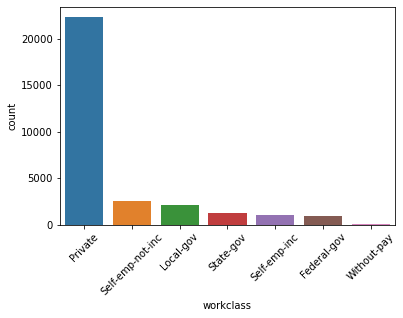



-------- education -----------


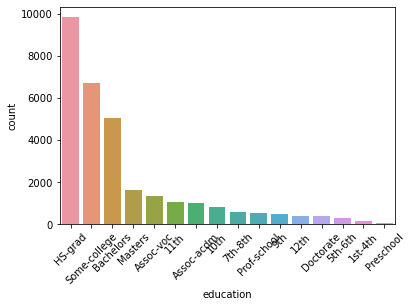



-------- marital-status -----------


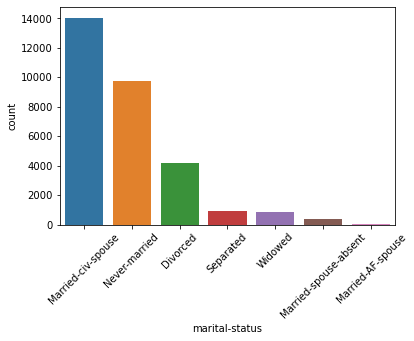



-------- occupation -----------


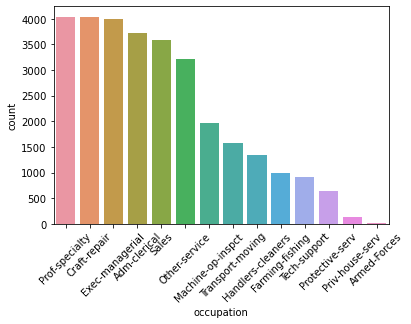



-------- relationship -----------


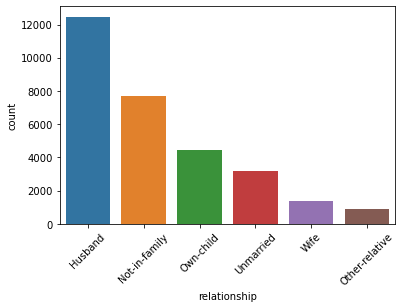



-------- race -----------


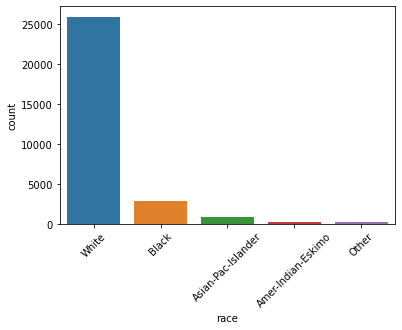



-------- sex -----------


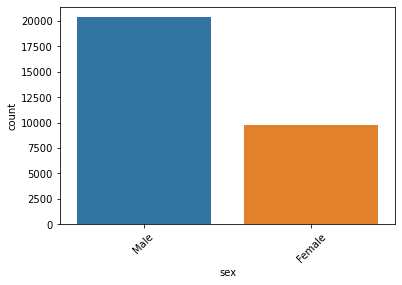



-------- native-country -----------


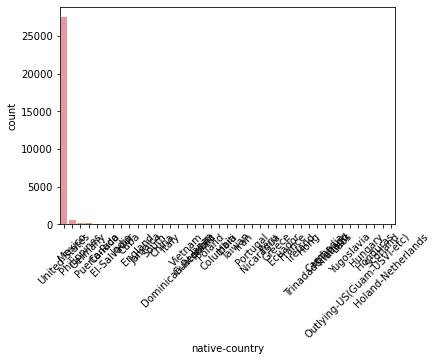

In [209]:
import seaborn as sns
import warnings
warnings.simplefilter ('ignore')

colms = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
for col in colms:
    print("--------",col,"-----------")
    sns.countplot(a_train[col],order=a_train[col].value_counts().index);
    plt.xticks(rotation=45)
    plt.show()
    print("\n")

In [210]:
workclass_value = {'Private':0, 'Self-emp-not-inc':1, 'Local-gov':2, 'State-gov':3, 'Self-emp-inc':4, 'Federal-gov':5, 'Without-pay':6}
a_train['workclass'] = a_train['workclass'].map(workclass_value)

In [211]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(a_train['education'])
print(le.classes_)
a_train['education'] = le.transform(a_train['education'])
a_train.head()

['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,3,77516,9,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,1,83311,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,0,215646,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,0,234721,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,0,338409,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [212]:
le.fit(a_train['marital-status'])
print(le.classes_)
a_train['marital-status'] = le.transform(a_train['marital-status'])
a_train.head()

['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,3,77516,9,13,4,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,1,83311,9,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,0,215646,11,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,0,234721,1,7,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,0,338409,9,13,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [213]:
le.fit(a_train['occupation'])
print(le.classes_)
a_train['occupation'] = le.transform(a_train['occupation'])
a_train.head()

['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,3,77516,9,13,4,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,1,83311,9,13,2,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,0,215646,11,9,0,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,0,234721,1,7,2,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,0,338409,9,13,2,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [214]:
le.fit(a_train['relationship'])
print(le.classes_)
a_train['relationship'] = le.transform(a_train['relationship'])
a_train.head()

['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,3,77516,9,13,4,0,1,White,Male,2174,0,40,United-States,<=50K
1,50,1,83311,9,13,2,3,0,White,Male,0,0,13,United-States,<=50K
2,38,0,215646,11,9,0,5,1,White,Male,0,0,40,United-States,<=50K
3,53,0,234721,1,7,2,5,0,Black,Male,0,0,40,United-States,<=50K
4,28,0,338409,9,13,2,9,5,Black,Female,0,0,40,Cuba,<=50K


In [215]:
le.fit(a_train['race'])
print(le.classes_)
a_train['race'] = le.transform(a_train['race'])
a_train.head()

['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,3,77516,9,13,4,0,1,4,Male,2174,0,40,United-States,<=50K
1,50,1,83311,9,13,2,3,0,4,Male,0,0,13,United-States,<=50K
2,38,0,215646,11,9,0,5,1,4,Male,0,0,40,United-States,<=50K
3,53,0,234721,1,7,2,5,0,2,Male,0,0,40,United-States,<=50K
4,28,0,338409,9,13,2,9,5,2,Female,0,0,40,Cuba,<=50K


In [216]:
gender_value = {'Male':0,'Female':1}
a_train['sex'] = a_train['sex'].map(gender_value)

In [217]:
le.fit(a_train['native-country'])
print(le.classes_)
a_train['native-country'] = le.transform(a_train['native-country'])
a_train.head()

['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong' 'Hungary' 'India' 'Iran'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicaragua'
 'Outlying-US(Guam-USVI-etc)' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Puerto-Rico' 'Scotland' 'South' 'Taiwan' 'Thailand' 'Trinadad&Tobago'
 'United-States' 'Vietnam' 'Yugoslavia']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,3,77516,9,13,4,0,1,4,0,2174,0,40,38,<=50K
1,50,1,83311,9,13,2,3,0,4,0,0,0,13,38,<=50K
2,38,0,215646,11,9,0,5,1,4,0,0,0,40,38,<=50K
3,53,0,234721,1,7,2,5,0,2,0,0,0,40,38,<=50K
4,28,0,338409,9,13,2,9,5,2,1,0,0,40,4,<=50K


In [218]:
le.fit(a_train['class'])
print(le.classes_)
a_train['class'] = le.transform(a_train['class'])
a_train.head()

['<=50K' '>50K']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,3,77516,9,13,4,0,1,4,0,2174,0,40,38,0
1,50,1,83311,9,13,2,3,0,4,0,0,0,13,38,0
2,38,0,215646,11,9,0,5,1,4,0,0,0,40,38,0
3,53,0,234721,1,7,2,5,0,2,0,0,0,40,38,0
4,28,0,338409,9,13,2,9,5,2,1,0,0,40,4,0


<AxesSubplot:>

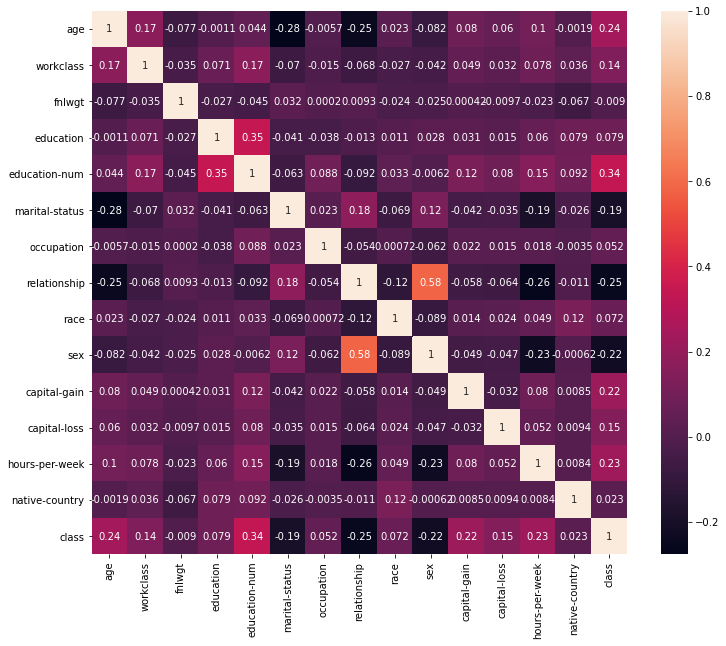

In [219]:
a_train.corr()
#plotting the correlation
plt.figure(figsize=(12,10))
sns.heatmap(a_train.corr(), annot = True)

# cleaning testing dataset

In [220]:
import pandas as pd
import numpy as np

a_test = pd.read_csv('adult.test',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'],skipinitialspace=True)
print(a_test.shape)
a_test.head()

(16282, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [221]:
a_test = a_test.dropna()

In [222]:
a_test = a_test.replace(to_replace='?',value=np.nan)
a_test.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
class               0
dtype: int64

In [223]:
a_test = a_test.dropna(how='any',subset=['workclass','occupation','native-country'])
a_test = a_test.reset_index(drop=True)

In [224]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
colms = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','class']
for i in colms:
    le.fit(a_test[i])
    a_test[i] = le.transform(a_test[i])
    
a_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,2,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,37,0
1,38,2,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,37,0
2,28,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37,1
3,44,2,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,37,1
4,34,2,198693.0,0,6.0,4,7,1,4,1,0.0,0.0,30.0,37,0


# data preprocessing

In [225]:
X_train = a_train.iloc[:,:14]
Y_train = a_train.iloc[:,14]

X_test = a_test.iloc[:,:14]
Y_test = a_test.iloc[:,14]

In [226]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [227]:
method=[]
accuracy=[]

# logistic regression 

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [229]:
logreg = LogisticRegression()
logreg.fit(X_train_sc,Y_train)
predictions_lr_test = logreg.predict(X_test_sc)
predictions_lr_train = logreg.predict(X_train_sc)

In [230]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

confusion_matrix_lr = confusion_matrix(Y_test,predictions_lr_test)
print("confusion matrix:\n",confusion_matrix_lr)

confusion matrix:
 [[10886   474]
 [ 2582  1118]]


In [231]:
classification_report_lr = classification_report(Y_test,predictions_lr_test)
print("classification report:\n",classification_report_lr)

classification report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88     11360
           1       0.70      0.30      0.42      3700

    accuracy                           0.80     15060
   macro avg       0.76      0.63      0.65     15060
weighted avg       0.78      0.80      0.77     15060



In [232]:
accuracy_score_lr_train = accuracy_score(Y_train, predictions_lr_train)*100
accuracy_score_lr_test = accuracy_score(Y_test, predictions_lr_test)*100
print("train accurcy: ",accuracy_score_lr_train, " %")
print("test accurcy: ",accuracy_score_lr_test, " %")

train accurcy:  81.97069159870036  %
test accurcy:  79.70783532536521  %


In [233]:
method.append('LR')
accuracy.append(accuracy_score_lr_test)

In [234]:
from sklearn.model_selection import GridSearchCV

grid_values = {
    'penalty': ['l1','l2'],
    'C': [0.001,0.01,0.1,1,10]
}

logistic_grid = GridSearchCV(logreg, param_grid=grid_values, n_jobs=-1)
logistic_grid.fit(X_train_sc,Y_train)
predictions_lr_gs_train=logistic_grid.predict(X_train_sc)
predictions_lr_gs_test=logistic_grid.predict(X_test_sc)

print('Train Accuracy : ',accuracy_score(Y_train, predictions_lr_gs_train)*100)
print('Test Accuracy : ',accuracy_score(Y_test, predictions_lr_gs_test)*100)
print('Best Accuracy Through Grid Search : %.5f'%logistic_grid.best_score_)
print('Best Parameters : ',logistic_grid.best_params_)

Train Accuracy :  81.95742987865526
Test Accuracy :  79.7011952191235
Best Accuracy Through Grid Search : 0.81954
Best Parameters :  {'C': 0.1, 'penalty': 'l2'}


In [235]:
method.append('LR with GSCV')
accuracy.append(accuracy_score(Y_test, predictions_lr_gs_test)*100)

# Decision tree

In [236]:
from sklearn.tree import DecisionTreeClassifier

In [237]:
classifier_dt = DecisionTreeClassifier(random_state=11)
classifier_dt.fit(X_train_sc, Y_train)
predictions_dt = classifier_dt.predict(X_test_sc)

In [238]:
confusion_matrix_dt = confusion_matrix(Y_test,predictions_dt)
print("confusion matrix:\n",confusion_matrix_dt)

confusion matrix:
 [[9584 1776]
 [1499 2201]]


In [239]:
classification_report_dt = classification_report(Y_test,predictions_dt)
print("classification report:\n",classification_report_dt)

classification report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     11360
           1       0.55      0.59      0.57      3700

    accuracy                           0.78     15060
   macro avg       0.71      0.72      0.71     15060
weighted avg       0.79      0.78      0.79     15060



In [240]:
accuracy_score_dt = accuracy_score(Y_test, predictions_dt)*100
print("test accurcy: ",accuracy_score_dt, " %")

test accurcy:  78.25365205843293  %


In [241]:
max_depth = classifier_dt.get_depth()
print(max_depth)

40


In [242]:
method.append('DT')
accuracy.append(accuracy_score_dt)

GRID SEARCH CV

In [243]:
from sklearn.model_selection import ParameterGrid,GridSearchCV
from sklearn.metrics import make_scorer

max_depth_GS = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=11),
    scoring=make_scorer(accuracy_score),
    param_grid = ParameterGrid(
        {"max_depth":[[max_depth] for max_depth in range (1,max_depth+1)]})
)

max_depth_GS.fit(X_train_sc,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=11),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x00000211B2B242C8>,
             scoring=make_scorer(accuracy_score))

In [244]:
print(max_depth_GS.best_params_)
print(max_depth_GS.best_estimator_)

{'max_depth': 8}
DecisionTreeClassifier(max_depth=8, random_state=11)


In [245]:
predictions_dt_gs = max_depth_GS.predict(X_test_sc)

In [246]:
confusion_matrix_dt_gs = confusion_matrix(Y_test,predictions_dt_gs)
print("confusion matrix:\n",confusion_matrix_dt_gs)

confusion matrix:
 [[10745   615]
 [ 1672  2028]]


In [247]:
classification_report_dt_gs = classification_report(Y_test,predictions_dt_gs)
print("classification report:\n",classification_report_dt_gs)

classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.90     11360
           1       0.77      0.55      0.64      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.75      0.77     15060
weighted avg       0.84      0.85      0.84     15060



In [248]:
accuracy_score_dt_gs = accuracy_score(Y_test, predictions_dt_gs)*100
print("test accurcy: ",accuracy_score_dt_gs, " %")

test accurcy:  84.81407702523241  %


In [249]:
method.append('DT with GSCV')
accuracy.append(accuracy_score_dt_gs)

BAGGING

In [250]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10)
model_bagging_dt = BaggingClassifier(base_estimator=classifier_dt,random_state=seed)
results = model_selection.cross_val_score(model_bagging_dt,X_train_sc,Y_train,cv=kfold)
for i in range(len(results)):
    print("Model: "+str(i)+" Accuracy is: "+str(results[i]))

print("mean accuracy is: "+str(results.mean()))

Model: 0 Accuracy is: 0.8346039111700364
Model: 1 Accuracy is: 0.8475306595956248
Model: 2 Accuracy is: 0.8504641909814323
Model: 3 Accuracy is: 0.8309018567639257
Model: 4 Accuracy is: 0.8381962864721485
Model: 5 Accuracy is: 0.8527851458885941
Model: 6 Accuracy is: 0.8405172413793104
Model: 7 Accuracy is: 0.8531167108753316
Model: 8 Accuracy is: 0.8425066312997348
Model: 9 Accuracy is: 0.8421750663129973
mean accuracy is: 0.8432797700739135


In [251]:
model_bagging_dt.fit(X_train_sc,Y_train)
predictions_nb_bagging = model_bagging_dt.predict(X_test_sc)
accuracy_score_nb= accuracy_score(Y_test, predictions_nb_bagging)*100
print("test accurcy: ",accuracy_score_nb, " %")

test accurcy:  83.85790172642761  %


In [252]:
method.append('DT with Bagging')
accuracy.append(accuracy_score_nb)

# SVM

In [253]:
from sklearn.svm import LinearSVC # "Support vector classifier"  

classifier_svm = LinearSVC()
classifier_svm.fit(X_train_sc, Y_train)  
predictions_svm = classifier_svm.predict(X_test_sc)

In [254]:
confusion_matrix_svm = confusion_matrix(Y_test,predictions_svm)
print("confusion matrix:\n",confusion_matrix_svm)

confusion matrix:
 [[10943   417]
 [ 2630  1070]]


In [255]:
classification_report_svm = classification_report(Y_test,predictions_svm)
print("classification report:\n",classification_report_svm)

classification report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88     11360
           1       0.72      0.29      0.41      3700

    accuracy                           0.80     15060
   macro avg       0.76      0.63      0.65     15060
weighted avg       0.78      0.80      0.76     15060



In [256]:
accuracy_score_svm = accuracy_score(Y_test, predictions_svm)*100
print("test accurcy: ",accuracy_score_svm, " %")

test accurcy:  79.7675962815405  %


In [257]:
method.append('SVC')
accuracy.append(accuracy_score_svm)

In [258]:
parameters_svc = {'C': [0.001,0.01,0.1,1,10]} 

gs_svc = GridSearchCV(LinearSVC(),parameters_svc,refit=True,verbose=3,n_jobs=-1)
gs_svc.fit(X_train_sc,Y_train)
gs_svc.best_params_
c_val = gs_svc.best_estimator_.C

#Then you can re-run predictions on this grid object just like you would with a normal model.
grid_predictions = gs_svc.predict(X_test_sc)
print("\nC value: ",c_val)
print("\nConfusion matrix:\n",confusion_matrix(Y_test,grid_predictions))
print("\nclassification report: \n",classification_report(Y_test,grid_predictions))

accuracy_score_svm_gs = accuracy_score(Y_test, grid_predictions)*100
print("test accurcy: ",accuracy_score_svm_gs, " %")

Fitting 5 folds for each of 5 candidates, totalling 25 fits

C value:  0.1

Confusion matrix:
 [[10944   416]
 [ 2631  1069]]

classification report: 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88     11360
           1       0.72      0.29      0.41      3700

    accuracy                           0.80     15060
   macro avg       0.76      0.63      0.65     15060
weighted avg       0.78      0.80      0.76     15060

test accurcy:  79.7675962815405  %


In [259]:
method.append('SVC GSCV')
accuracy.append(accuracy_score_svm_gs)

SMOTE OVERSAMPLING

In [260]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, Y_train_smote = smote.fit_resample(X_train,Y_train)
np.unique(Y_train_smote,return_counts=True)
X_train_smote = sc.fit_transform(X_train_smote)

In [261]:
#DECISION TREE

classifier_dt.fit(X_train_smote,Y_train_smote)
predictions_dt_smote = classifier_dt.predict(X_test_sc)
confusion_matrix_dt_smote = confusion_matrix(Y_test,predictions_dt_smote)
print("confusion matrix:\n",confusion_matrix_dt_smote,"\n")
accuracy_score_lr_smote = accuracy_score(Y_test, predictions_dt_smote)*100
print("test accurcy: ",accuracy_score_lr_smote, " %")

method.append('DT with SMOTE')
accuracy.append(accuracy_score_lr_smote)

confusion matrix:
 [[8045 3315]
 [1098 2602]] 

test accurcy:  70.69721115537848  %


In [262]:
#DECISION TREE OVERSAMPLING GRIDSEARCHCV

max_depth_GS.fit(X_train_smote,Y_train_smote)
predictions_dt_gs_model = max_depth_GS.predict(X_test_sc)
confusion_matrix_dt_gs_smote = confusion_matrix(Y_test,predictions_dt_gs_model)
print("confusion matrix:\n",confusion_matrix_dt_gs_smote,"\n")
accuracy_score_gs_smote = accuracy_score(Y_test, predictions_dt_gs_model)*100
print("test accurcy: ",accuracy_score_gs_smote, " %")

method.append('DT GSCV with SMOTE')
accuracy.append(accuracy_score_gs_smote)

confusion matrix:
 [[8372 2988]
 [ 969 2731]] 

test accurcy:  73.72509960159363  %


Text(0, 0.5, 'Accuracy')

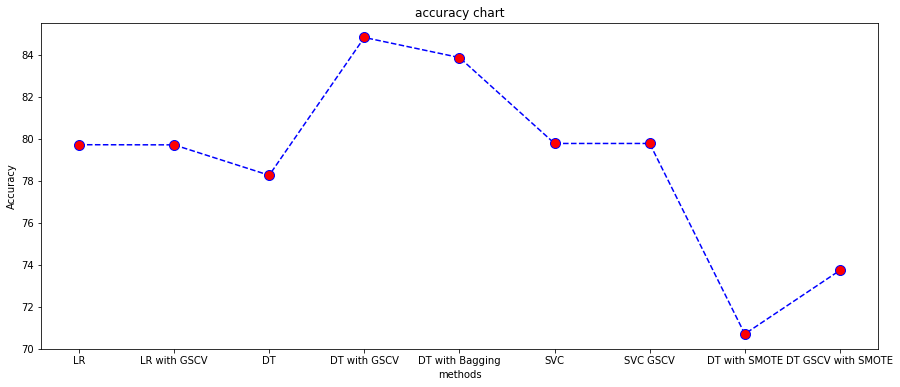

In [263]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(method,accuracy,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy chart')
plt.xlabel('methods')
plt.ylabel('Accuracy')